In [1]:
import pandas as pd
import pandas_datareader as dr
import FinanceDataReader as fdr

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)

tickers = data_table[0]['Symbol'].tolist()
security = data_table[0]['Security'].tolist()
sector = data_table[0]['GICS Sector'].tolist()

tickers = tickers[0:60]
security = security[0:60]
sector = sector[0:60]

prices_list = []

In [3]:
print(len(tickers))
print(len(security))
print(len(sector))

60
60
60


In [4]:
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list, axis=1)

# prices_df.sort_index(inplace=True)
prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR,BLL
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,153.196838,35.741627,49.596874,112.360001,107.657784,35.534645,103.480003,11.43,166.497437,9.797544,...,85.047356,31.699472,66.985687,76.180000,93.503708,791.460022,150.533005,64.293442,39.209698,36.368553
2017-01-04,153.429138,36.025352,50.296207,115.739998,107.916618,36.232925,104.139999,11.43,167.863815,9.713517,...,85.923843,31.515257,67.363075,77.519997,93.648254,793.039978,151.155151,66.126740,39.040871,36.920677
2017-01-05,152.904282,36.336555,50.677647,114.809998,106.298897,36.795425,105.910004,11.24,167.746674,9.587478,...,85.959999,31.426842,67.030617,76.930000,93.088142,792.000000,152.075653,65.475922,38.799698,36.901466
2017-01-06,153.351730,37.325047,50.693546,115.419998,107.509888,36.766335,108.300003,11.32,165.550827,9.931986,...,86.728081,30.800692,66.644272,79.300003,93.151398,792.909973,153.413773,66.365051,38.564545,37.064709
2017-01-09,152.525711,37.288441,51.027317,117.110001,106.308136,36.562668,108.570000,11.49,165.453186,9.688307,...,85.038307,30.413069,65.781670,79.589996,92.573196,790.340027,151.044388,66.511711,38.130424,36.478970


In [5]:
df = prices_df.pct_change().iloc[1:].T

In [6]:
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2021-11-10,2021-11-11,2021-11-12,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-22,2021-11-23
MMM,0.001516,-0.003421,0.002926,-0.005386,-0.003892,0.007418,-0.002529,-0.000282,-0.000733,0.006939,...,0.006011,-0.012115,0.019144,-0.001906,0.000327,-0.000164,-0.016991,0.002573,0.002399,-0.001113
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001341,-0.008763,0.005157,-0.000733,-0.003423,...,0.010994,-0.004459,0.009430,0.007707,0.011202,-0.017343,-0.007619,-0.006268,-0.012457,-0.006227
ABBV,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.009861,-0.001028,0.002915,-0.001111,-0.003595,0.007988,-0.002386,-0.007090,-0.005076,0.027929
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,-0.042494,0.002869,0.012059,-0.034720,0.009703,-0.023426,-0.009607,-0.000617,-0.013736,-0.021293
ACN,0.002404,-0.014990,0.011392,-0.011178,0.000522,0.009212,-0.002928,0.010105,-0.007867,-0.000690,...,-0.007429,0.004030,0.013708,-0.007489,0.007355,0.004365,-0.005365,-0.002670,-0.017551,-0.007157


In [7]:
companies = list(df.index)
companies

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL']

In [8]:
movements = df.values
movements

array([[ 0.00151635, -0.00342084,  0.00292633, ...,  0.00257309,
         0.0023992 , -0.0011132 ],
       [ 0.00793824,  0.00863844,  0.02720376, ..., -0.00626765,
        -0.01245659, -0.00622704],
       [ 0.01410035,  0.00758386,  0.00031374, ..., -0.00708979,
        -0.00507567,  0.02792906],
       ...,
       [ 0.02851454, -0.00984198,  0.01357949, ..., -0.00573298,
         0.00205929,  0.01132573],
       [-0.00430575, -0.00617744, -0.0060607 , ..., -0.05766824,
         0.00443461,  0.04900665],
       [ 0.01518136, -0.00052033,  0.00442374, ...,  0.01570787,
        -0.00773248, -0.00895112]])

In [9]:
normalize = Normalizer()
array_norm = normalize.fit_transform(df)
df_norm = pd.DataFrame(array_norm, columns=df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2021-11-10,2021-11-11,2021-11-12,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-22,2021-11-23
MMM,0.002743,-0.006188,0.005294,-0.009744,-0.007041,0.013419,-0.004576,-0.000510,-0.001326,0.012552,...,0.010874,-0.021915,0.034631,-0.003447,0.000592,-0.000296,-0.030736,0.004655,0.004340,-0.002014
ABT,0.014370,0.015638,0.049246,-0.001775,0.024439,0.002427,-0.015864,0.009336,-0.001327,-0.006197,...,0.019902,-0.008073,0.017071,0.013952,0.020279,-0.031395,-0.013793,-0.011346,-0.022550,-0.011273
ABBV,0.022658,0.012187,0.000504,0.010580,-0.003503,-0.058014,0.003680,0.018618,-0.003370,-0.005195,...,0.015845,-0.001652,0.004685,-0.001786,-0.005776,0.012837,-0.003834,-0.011393,-0.008156,0.044880
ABMD,0.032771,-0.008754,0.005788,0.015951,-0.045303,-0.009415,0.010770,0.031993,-0.015540,-0.007166,...,-0.046293,0.003125,0.013137,-0.037824,0.010570,-0.025521,-0.010466,-0.000673,-0.014964,-0.023197
ACN,0.004375,-0.027276,0.020729,-0.020339,0.000950,0.016763,-0.005328,0.018387,-0.014314,-0.001255,...,-0.013518,0.007333,0.024942,-0.013626,0.013383,0.007942,-0.009762,-0.004858,-0.031934,-0.013022
ATVI,0.025280,0.019971,-0.001017,-0.007126,0.023204,0.027485,-0.002297,-0.005918,0.000000,0.004294,...,-0.008436,0.016211,0.041738,0.013660,-0.078359,-0.037734,-0.030658,-0.005953,-0.003712,-0.008893
ADBE,0.008877,0.023656,0.031408,0.003470,-0.003974,0.009385,-0.005108,-0.000769,-0.006797,0.010181,...,-0.042551,-0.009307,0.031227,0.004508,0.023840,-0.000747,0.000602,0.036115,-0.029924,-0.017378
AMD,0.000000,-0.013361,0.005721,0.012070,-0.003498,-0.016862,-0.031575,-0.013445,-0.057736,0.004911,...,-0.048844,0.035282,0.010349,-0.007609,0.032700,-0.005852,0.019544,0.002022,-0.014946,-0.013701
AAP,0.010569,-0.000899,-0.016858,-0.000760,0.002963,0.026602,0.007723,0.002362,-0.013189,0.007295,...,0.013189,0.020186,0.003186,0.015462,-0.033113,-0.017157,-0.003489,-0.010661,0.010247,0.021887
AES,-0.011342,-0.017160,0.047521,-0.032447,-0.022939,0.051358,-0.021348,0.015988,0.021440,0.002221,...,0.011625,0.042802,-0.008505,0.016584,0.001585,-0.016359,-0.014961,0.005945,0.019369,-0.017499


In [10]:
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask, col_mask]

Date


In [11]:
num_of_clusters = range(2, 12)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)
    
table = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term":error})
table

,Cluster_Numbers,Error_Term
0,2,0.317862
1,3,0.290443
2,4,0.281826
3,5,0.266999
4,6,0.259253
5,7,0.247305
6,8,0.241537
7,9,0.236070
8,10,0.224857
9,11,0.218038


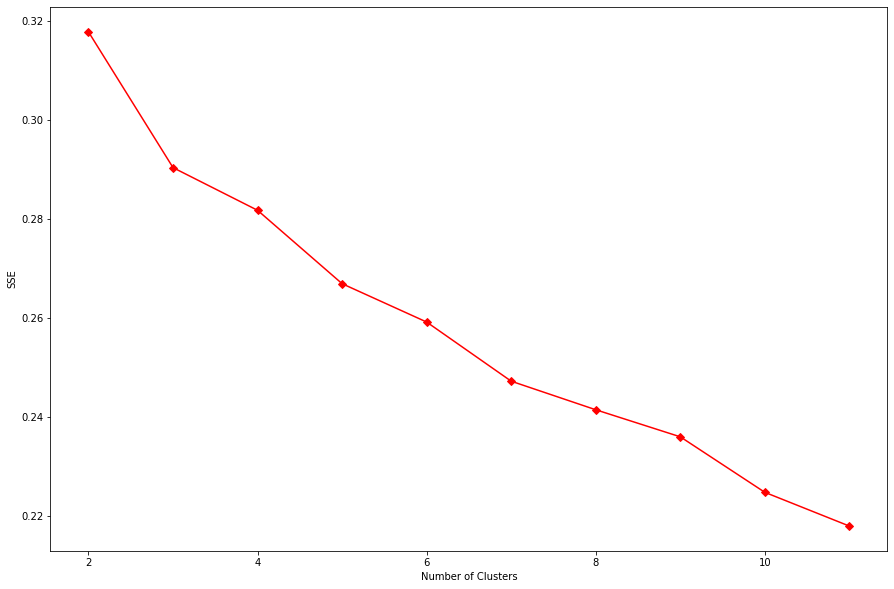

In [12]:
plt.figure(figsize=(15,10))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [13]:
clusters = KMeans(7)
clusters.fit(final_df)
clusters.labels_

array([1, 6, 6, 6, 0, 0, 0, 0, 3, 4, 5, 6, 5, 6, 5, 1, 2, 0, 1, 2, 5, 0,
       0, 5, 0, 4, 2, 5, 2, 5, 5, 2, 2, 5, 1, 1, 6, 1, 0, 0, 5, 5, 1, 4,
       0, 0, 5, 5, 0, 5, 5, 5, 2, 0, 5, 3, 2, 1, 5, 2], dtype=int32)

In [14]:
labels = clusters.predict(movements)
labels

array([1, 6, 6, 6, 0, 0, 0, 0, 3, 4, 5, 6, 5, 6, 5, 1, 2, 0, 1, 2, 5, 0,
       0, 5, 0, 4, 2, 5, 2, 5, 5, 2, 2, 5, 1, 1, 6, 1, 0, 0, 5, 5, 1, 4,
       0, 0, 5, 5, 0, 5, 5, 5, 2, 0, 5, 3, 2, 1, 5, 2], dtype=int32)

In [15]:
clustered_result = pd.DataFrame({'labels': labels, 'tickers': companies, 'full-name':security, 'sector':sector})
clustered_result.sort_values('labels')

,labels,tickers,full-name,sector
39,0,ANSS,Ansys,Information Technology
38,0,ADI,Analog Devices,Information Technology
44,0,AAPL,Apple,Information Technology
45,0,AMAT,Applied Materials,Information Technology
48,0,ANET,Arista Networks,Information Technology
7,0,AMD,Advanced Micro Devices,Information Technology
21,0,GOOGL,Alphabet (Class A),Communication Services
5,0,ATVI,Activision Blizzard,Communication Services
4,0,ACN,Accenture,Information Technology
53,0,ADSK,Autodesk,Information Technology


In [16]:
final_df['Cluster'] = clusters.labels_

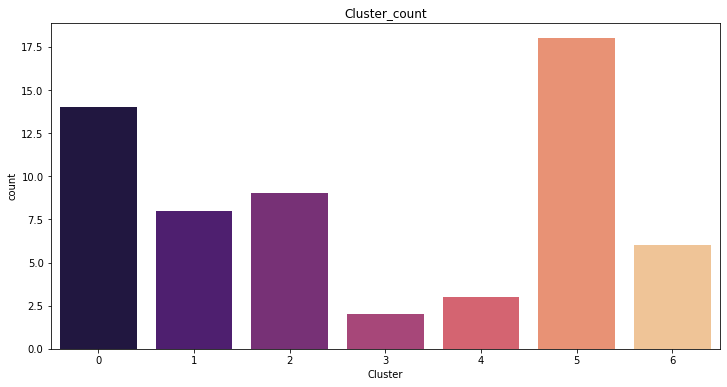

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')
plt.title('Cluster_count')
plt.show()
plt.savefig('cluster_count.png', dpi=300)